##  **I. Import libraries and read information basic dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from datetime import datetime, timedelta, date

from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree # hierarchy clustering

!pip install pandas numpy sklearn
from sklearn.cluster import KMeans

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Xin quyen Google drive
from google.colab import drive
drive.mount('/content/ggdrive')

Mounted at /content/ggdrive


In [ ]:
data = pd.read_csv('/content/ggdrive/MyDrive/Project/RFM_Analysis/OnlineRetail.csv', encoding='latin-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data.duplicated().sum()

5268

In [ ]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##  **II. Expolatory basic dataset and Processing**

---



In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

`comment`
- Cột Description có 1454 giá trị null
- Cột CustomerID có 135080 giá trị null

In [ ]:
# loai bo nan
data_not_nan = data[data['CustomerID'].notna()]
data_not_nan.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data_not_nan = data_not_nan.dropna()
data_not_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
data_not_nan.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


<Axes: >

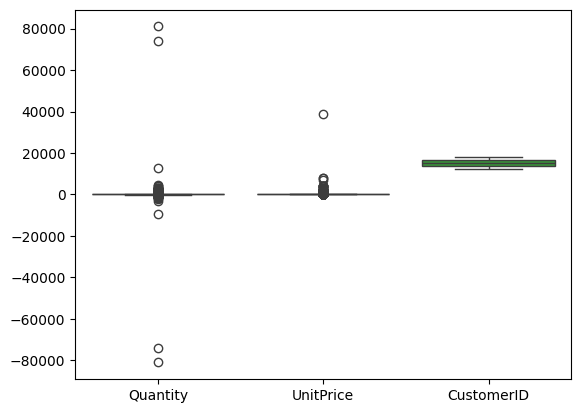

In [ ]:
sb.boxplot(data=data_not_nan)

`comment:`
- Ở 2 cột Quantity và UnitPrice, các điểm dữ liệu tập trung phần lớn với nhau.
- Tuy nhiên vẫn có những điểm nằm cách xa nó ▶ Các điểm đó có thể là các giá trị đặc biệt hoặc là Outliers

In [ ]:
data_not_nan[(data_not_nan['Quantity'] < -60000) | (data_not_nan['Quantity'] > 60000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom


`comment:`
Ở Quantity, dễ dàng thấy các điểm cùng ID khách hàng đều đặt với số lượng hàng 74215 và -74215 hoặc 80995 và -80995. Điều này có thể xảy ra do:

1.   Khách hàng sau khi Order sản phẩm liên đăng ký yêu cầu hủy Order vì 1 lý do nào đó (hoặc có thể seeding đơn hàng)
2.   Cửa hàng đưa ra các khuyến mãi mua 1 tặng 1 cho khách hàng

Vì điều này nên không thể xóa Outliers vì nó sẽ ảnh hưởng đến model



In [ ]:
data_not_nan[(data_not_nan['UnitPrice'] < -20000) | (data_not_nan['UnitPrice'] > 20000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.0,15098.0,United Kingdom


In [ ]:
data_not_nan.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##  **III. Calculate RFM**

#### **1. Calculate RFM**

In [ ]:
# string sang date
data_not_nan['InvoiceDate'] = pd.to_datetime(data_not_nan['InvoiceDate']).dt.date
data_not_nan['InvoiceDate'].head()

0    2010-12-01
1    2010-12-01
2    2010-12-01
3    2010-12-01
4    2010-12-01
Name: InvoiceDate, dtype: object

In [ ]:
# tinh ngay lon nhat + 1
curremt_date = data_not_nan['InvoiceDate'].max() + timedelta(days=1)
curremt_date

datetime.date(2011, 12, 10)

In [ ]:
# total
data_not_nan['TotalPay'] = data_not_nan['Quantity'] * data_not_nan['UnitPrice']

# group by id KH de tinh r f m
data_customers = data_not_nan.groupby('CustomerID').agg({'InvoiceDate': lambda x: (curremt_date - x.max()).days,
                                                'InvoiceNo': 'count',
                                                'TotalPay': 'sum'})

#### **2. Observe**

In [ ]:
data_customers.head()

,InvoiceDate,InvoiceNo,TotalPay
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [ ]:
data_customers = data_customers.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPay': 'Monetary'})
data_customers.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


`Comment:`  
- Cần theo dõi phân phối dữ liệu, để xem phân phối có ở dạng chuẩn không, nếu không chuẩn thì sẽ áp dụng các phương pháp [Transform Data](https://www.geeksforgeeks.org/data-transformation-in-machine-learning/) để đưa dữ liệu về dạng chuẩn để model hoạt động hiệu quả.

##  **IV. Data Transformation**

#### **1. Summary RFM data**

<ipython-input-22-89addde0e0ac>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_customers['Recency'], ax = ax[0])
<ipython-input-22-89addde0e0ac>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_customers['Frequency'], ax = ax[1])
<ipython-input-22-89addde0e0ac>:6: UserWarning: 

`distp

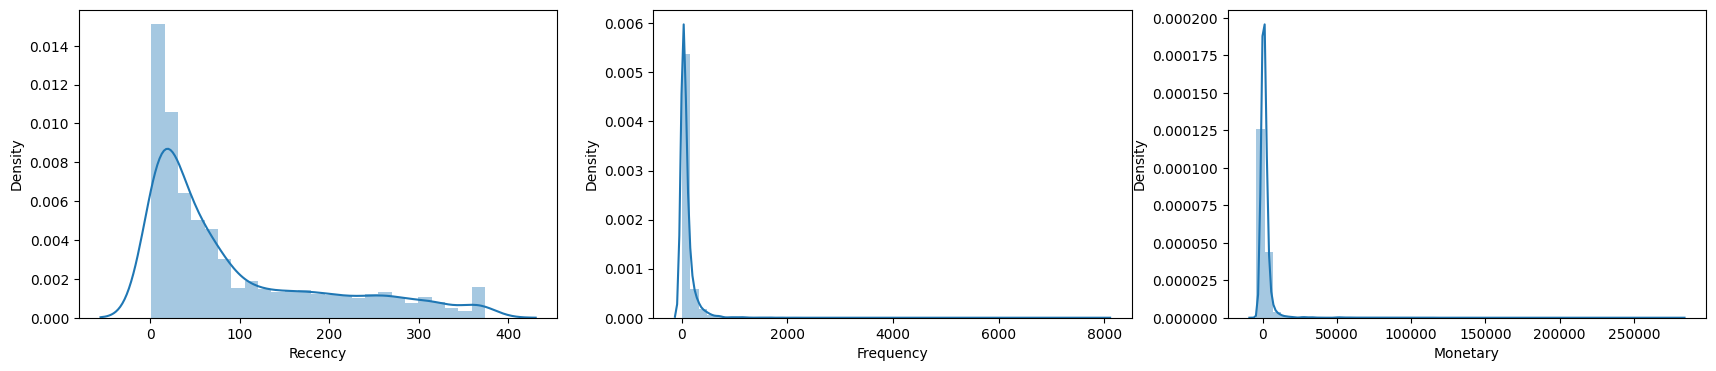

In [ ]:
# Ve phan phoi de kiem tra

fig, ax = plt.subplots(1, 3, figsize=(21,4))
sb.distplot(data_customers['Recency'], ax = ax[0])
sb.distplot(data_customers['Frequency'], ax = ax[1])
sb.distplot(data_customers['Monetary'], ax = ax[2])
plt.show()

`Comment:`  
- Quan sát phân phối ở 3 biểu đồ, ta thấy cả ba đại lượng đều theo Right-skewed (Positive skew) và không tuân theo phân phối chuẩn, chúng ta cần thực hiện một số phương pháp chuẩn hóa dữ liệu trước khi sử dụng một số thuật toán xây dựng model.  
-  Đề suất một số phương thức chuẩn hóa dữ liệu:
   - `log root` tranformation.  
   - `cube root` tranformation.
   - `square root` transformation.
   - `box-cox` tranformation.

#### **2. Trasform data**

In [ ]:
# Ham kiem tra phuong phap Transform nao chuan
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))

    # xu ly gia tri vo cuc
    valid_data = data_customers[x][np.isfinite(data_customers[x])]

    sb.distplot(data_customers[x], ax=ax[0,0])
    sb.distplot(np.log(data_customers[x]), ax=ax[0,1])
    sb.distplot(np.sqrt(data_customers[x]), ax=ax[1,0])
    sb.distplot(stats.boxcox(data_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

    print("Original Skewness:", data_customers[x].skew().round(2))
    print("Log Root-transformed Skewness:", np.log(data_customers[x]).skew().round(2))
    print("Square Root-transformed Skewness:", np.sqrt(data_customers[x]).skew().round(2))
    print("Boxcox Root-transformed Skewness:", pd.Series(stats.boxcox(data_customers[x])[0]).skew().round(2))

<ipython-input-23-f9ad18342058>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_customers[x], ax=ax[0,0])
<ipython-input-23-f9ad18342058>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(data_customers[x]), ax=ax[0,1])
<ipython-input-23-f9ad18342058>:11: UserWarning: 

`distplot` is 

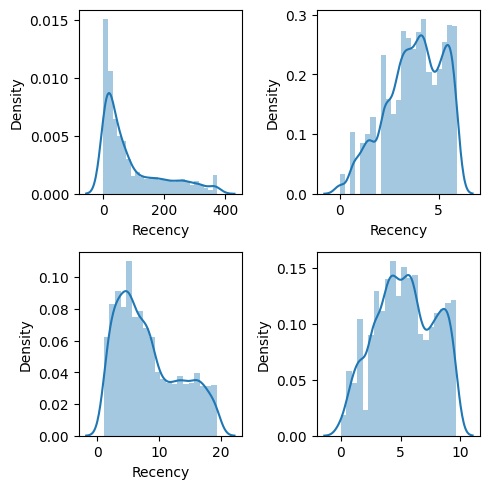

Original Skewness: 1.25
Log Root-transformed Skewness: -0.45
Square Root-transformed Skewness: 0.6
Boxcox Root-transformed Skewness: -0.07


In [ ]:
# test recency
analyze_skewness('Recency')

<ipython-input-23-f9ad18342058>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_customers[x], ax=ax[0,0])
<ipython-input-23-f9ad18342058>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(data_customers[x]), ax=ax[0,1])
<ipython-input-23-f9ad18342058>:11: UserWarning: 

`distplot` is 

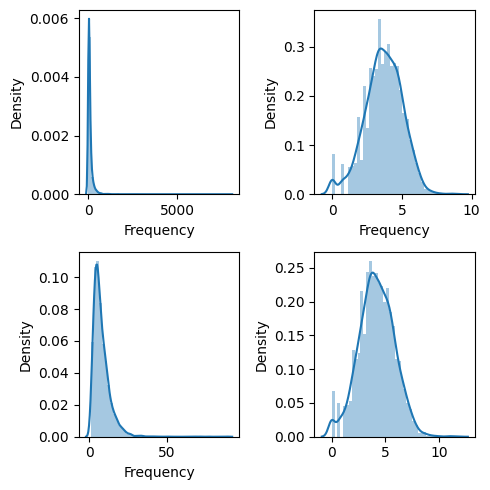

Original Skewness: 18.15
Log Root-transformed Skewness: -0.24
Square Root-transformed Skewness: 3.2
Boxcox Root-transformed Skewness: 0.0


In [ ]:
analyze_skewness('Frequency')

`Comment:`  
- Quan sát phân phối ở 2 tập biểu đồ trên, ta thấy Boxcox tạo ra phân phối gần = 0 (-0.07 và 0) nên ta chọn Boxcox để transform
- Đối với Monetary value có các giá trị âm nên sẽ dùng cube root (tính căn bậc ba)

In [ ]:
#transform du lieu
data_customers_use = pd.DataFrame()
data_customers_use['Recency'] = stats.boxcox(data_customers['Recency'])[0]
data_customers_use['Frequency'] = stats.boxcox(data_customers['Frequency'])[0]
data_customers_use['Monetary'] = pd.Series(np.cbrt(data_customers['Frequency'])).values
data_customers_use.head(10)

,Recency,Frequency,Monetary
0,9.314966,0.707055,1.259921
1,1.196521,6.060363,5.667051
2,6.146603,3.794006,3.141381
3,3.721132,4.862047,4.179339
4,9.201025,3.075409,2.571282
5,4.823034,5.201183,4.562903
6,8.227911,1.442672,1.587401
7,8.520248,4.570059,3.870877
8,8.335994,2.762414,2.351335
9,4.025584,4.591627,3.892996


In [ ]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_customers_use = scaler.fit_transform(data_customers_use)

data_customers_use

array([[ 1.60660756, -2.09807168, -1.47325215],
       [-1.69623952,  1.15134635,  1.12256919],
       [ 0.31761476, -0.22431569, -0.36506316],
       ...,
       [-1.18669014, -0.85048403, -0.83040413],
       [-1.55463945,  2.36366091,  3.15034578],
       [-0.11328792,  0.391469  ,  0.21210551]])

In [ ]:
pd.DataFrame(data_customers_use).head()

,0,1,2
0,1.606608,-2.098072,-1.473252
1,-1.696240,1.151346,1.122569
2,0.317615,-0.224316,-0.365063
3,-0.669146,0.423978,0.246300
4,1.560253,-0.660498,-0.700854


<ipython-input-29-efe83e8fc01d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_customers_use[:, 0], ax = ax[0]) # Access columns using integer indices
<ipython-input-29-efe83e8fc01d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data_customers_use[:, 1], ax = ax[1])
<ipython-input-29-efe

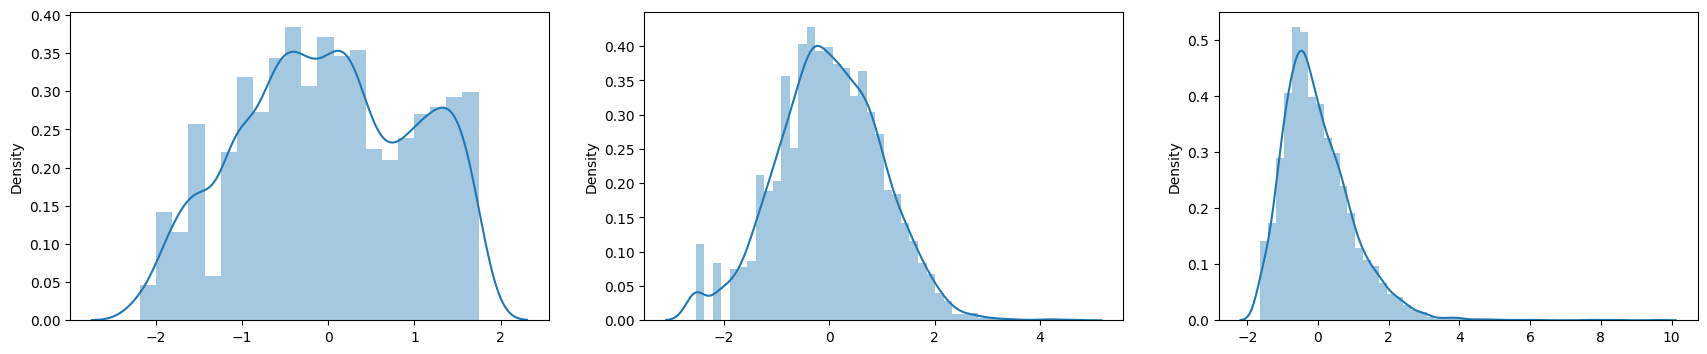

In [ ]:
# Quan sat lai phan phoi

fig, ax = plt.subplots(1, 3, figsize=(21,4))
sb.distplot(data_customers_use[:, 0], ax = ax[0]) # Access columns using integer indices
sb.distplot(data_customers_use[:, 1], ax = ax[1])
sb.distplot(data_customers_use[:, 2], ax = ax[2])
plt.show()

##  **V. Customer Segmentation by Machine Learning**

#### **1. Using Elbow Method to choose K**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

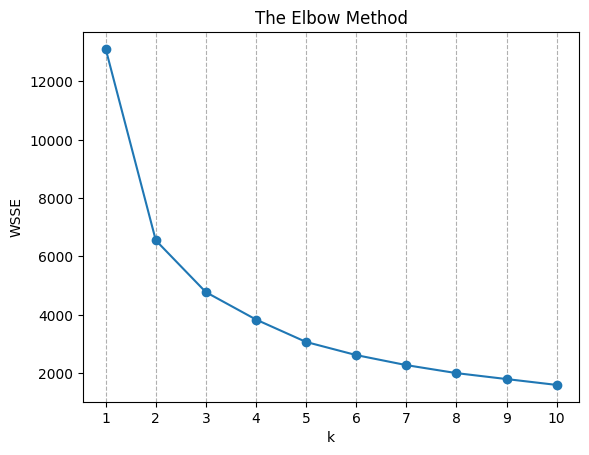

In [ ]:
# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_customers_use)
    sse[k] = kmeans.inertia_ # tra ve gia tri SSE

# set grid
plt.grid(axis = 'x', linestyle ='--')
plt.title('The Elbow Method')
plt.xticks(np.arange(0, 13, step=1))
plt.xlabel('k')
plt.ylabel('WSSE')
# Use plt.plot instead of plt.pointplot
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.show()

`Comment:`  
- Chọn k sao cho khi k tăng thì tổng bình phương khoảng cách đến tâm cụm centroid là SSE không giảm đi nhiều
▶ Tại điểm K=3, mức giảm WSSE bắt đầu chậm lại, cho thấy việc tăng số lượng cụm sau K=3 không mang lại sự cải thiện đáng kể về mặt giảm WSSE. Điều này cho thấy rằng K=3 là số lượng cụm tối ưu, cân bằng giữa độ phức tạp của mô hình và độ chính xác của phân cụm.
- Nhưng chúng ta cần thử các phương pháp tính K khác

#### **2. Using Silhouette Method to choose K**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

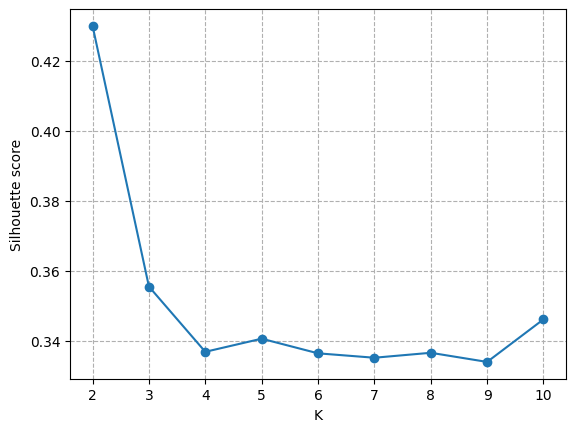

In [ ]:
# Tính điểm Silhouette trung bình cho các giá trị K khác nhau
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(data_customers_use)
    silhouette_scores.append(silhouette_score(data_customers_use, labels))

# Vẽ đồ thị điểm Silhouette trung bình theo K
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.grid(axis = 'x', linestyle ='--')
plt.grid(axis = 'y', linestyle ='--')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
# Điểm silhouette_scores cao nhất
max(silhouette_scores)

0.42994209745963025

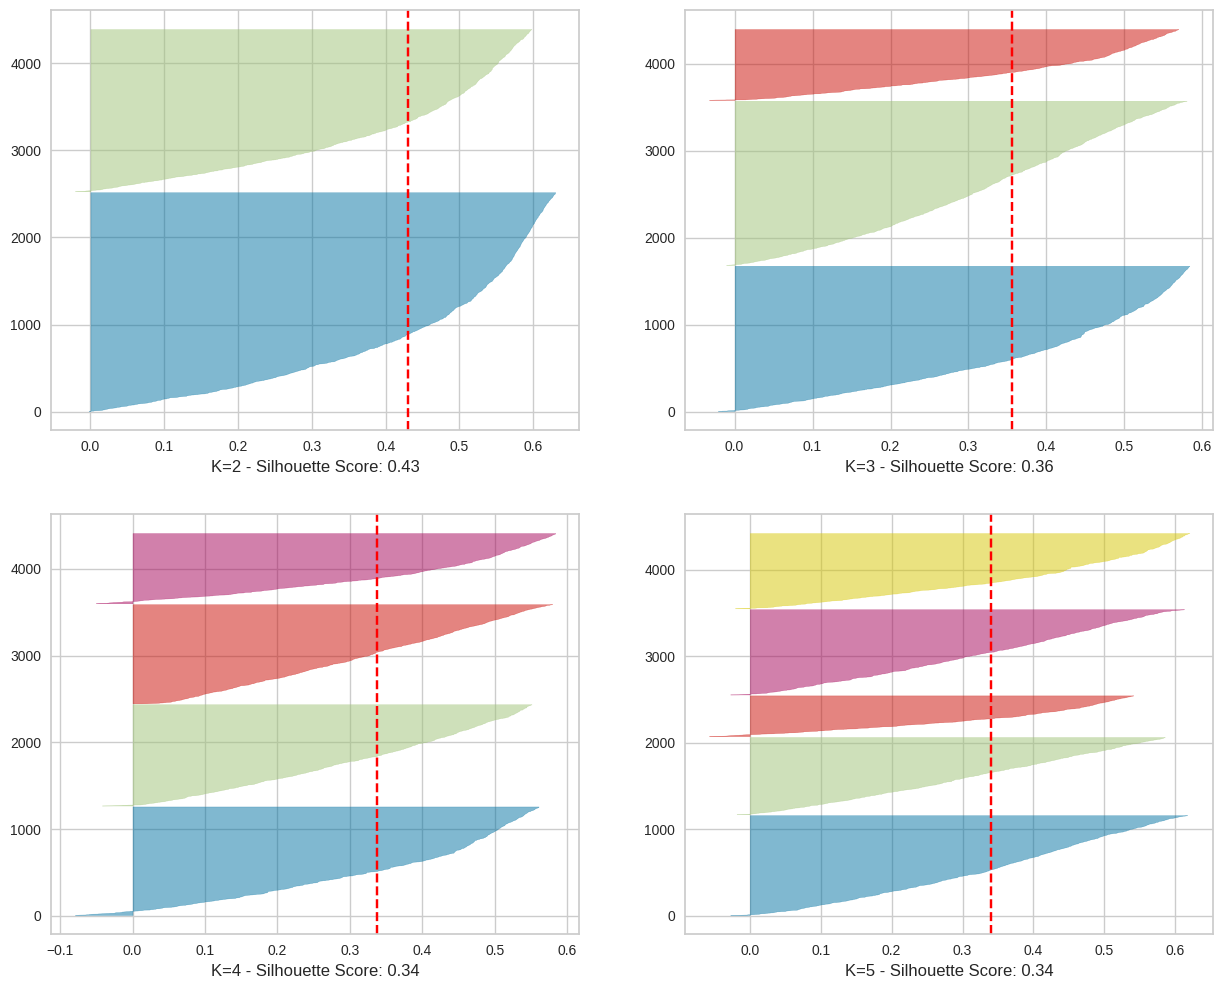

In [ ]:
# from yellowbrick.cluster import SilhouetteVisualizer

# fig, ax = plt.subplots(2, 2, figsize=(15,8))
# for k in [2, 3, 4, 5]:

#     kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
#     q, mod = divmod(k, 2)

#     visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
#     visualizer.fit(data_customers_use)
# # Tính toán và in ra giá trị Silhouette trung bình
#     silhouette_avg = np.mean(visualizer.silhouette_samples_)
#     ax[q][mod].text(0.5, -0.1, f'Silhouette Avg: {silhouette_avg:.2f}', ha='center', va='center', transform=ax[q][mod].transAxes)

# visualizer.show()
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,12))

for k in [2, 3, 4, 5]:
    # Khởi tạo thuật toán K-Means với k cụm
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)

    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_customers_use)
    # Tính toán và in ra giá trị Silhouette trung bình
    silhouette_avg = np.mean(visualizer.silhouette_samples_)
    # Use q-1 instead of q to access the correct axes object
    ax[q-1][mod].text(0.5, -0.1, f'K={k} - Silhouette Score: {silhouette_avg:.2f}', ha='center', transform=ax[q-1][mod].transAxes)
# plt.title('Silhouette Method')
plt.xlabel('')
plt.ylabel('')
plt.show()

`Comment:`
- Điểm Silhouette trung bình (Silhouette Score) cho K=2 đạt giá trị cao nhất (0.43), nhưng khi nhìn vào mật độ dữ liệu trong mỗi cụm tương đối cao. Tuy điểm số và sự tập trung dữ liệu giữa các cụm là hợp lý nhưng chúng ta cần nhiều hơn 2 nhóm khách hàng trong bài toán này để xác định rõ hơn đặc điểm chi tiết của từng nhóm, tạo điều kiện lập kế hoạch hiệu quả cho thời gian sắp tới.
- Ở K=3 điểm Silhouette trung bình cũng khá tốt (0.36), các hình Silhouette có dạng khá "đều đặn", ít điểm dữ liệu ở ranh giới giữa các cụm. Dù không đẹp bằng K=2, nhưng vẫn tốt hơn K=4 và K=5.

#### **3. Using Hierarchical Clustering**

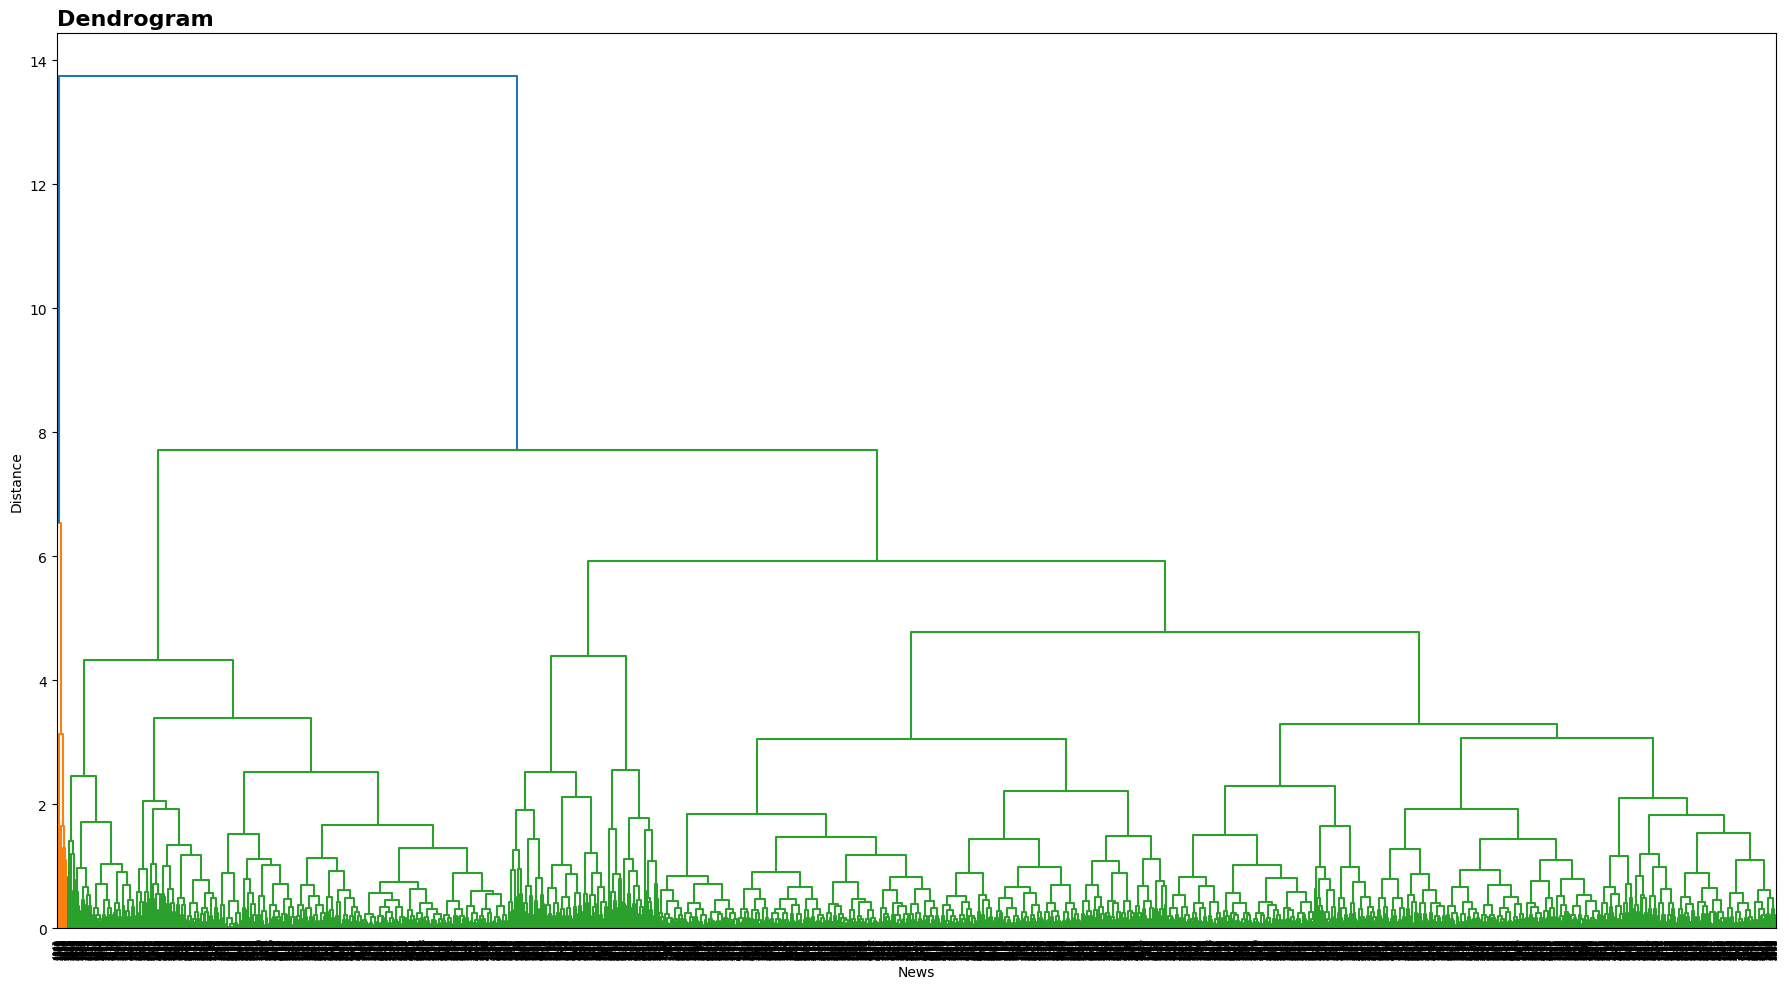

In [ ]:
# Tính toán single linkage (khoảng cách giữa các cụm)
mergings = linkage(data_customers_use, method="complete", metric='euclidean')
# Đặt lại kiểu biểu đồ
plt.style.use('default')
# Plot by dendogram
plt.figure(figsize=(18,10))
dendrogram(mergings, leaf_rotation= 90, leaf_font_size= 6)
plt.title('Dendrogram',loc = 'left',  fontweight = 'heavy', fontsize = 16)
plt.xlabel('News')
plt.ylabel('Distance')
plt.tight_layout()
plt.show();

`Comment:`  
Có thể thấy khoảng cách từ cột đầu (xanh dương) đến khoảng cách cột xanh lá và cam tương đối lớn (khoảng 6 và hơn) so với các điểm nối khác ▶ cho thấy cụm này tách biệt rõ ràng so với các cụm còn lại. ▶ Phân cụm tốt
▶ 3 cụm có vẻ là lựa chọn hợp lý nhất

`Kết luận:`
▶ Cả ba phương pháp đều chỉ ra K=3 là điểm tối ưu.
- Elbow Method chỉ ra K=3 là điểm tối ưu dựa trên việc giảm WSSSE.
- Silhouette Method cho thấy K=3 có khả năng mang lại sự phân cụm đều đặn hơn, mặc dù điểm Silhouette trung bình thấp hơn K=5.
-Hierarchical Clustering cũng chỉ ra K=3 là điểm cắt hợp lý nhất dựa trên khoảng cách giữa các cụm.

#### **4. Choose k = 3 and fit it with scaler data**

In [ ]:
data_customers_use = pd.DataFrame(data_customers_use)  # Convert to DataFrame
# Convert all column names to strings
data_customers_use.columns = data_customers_use.columns.astype(str)
# Khởi tạo thuật toán K-Means với 3 cụm
model = KMeans(n_clusters=3, random_state = 42)
# Huấn luyện mô hình
model.fit(data_customers_use)
# dự đoán cụm
clusters = model.predict(data_customers_use)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Phân bổ điểm dữ liệu vào các cụm
data_customers_use['Cluster'] = model.labels_
data_customers_use.head()

,0,1,2,Cluster
0,1.606608,-2.098072,-1.473252,0
1,-1.696240,1.151346,1.122569,2
2,0.317615,-0.224316,-0.365063,1
3,-0.669146,0.423978,0.246300,1
4,1.560253,-0.660498,-0.700854,0


`Visualize with 3D graph by Recency, Frequency and Monetary for scaled data (data_customers_use)`

In [ ]:
# Tâm cụm
centroids = model.cluster_centers_
pd.DataFrame(centroids).head()

,0,1,2
0,0.859797,-0.897946,-0.808228
1,-0.331890,0.187105,0.043973
2,-0.994167,1.408252,1.556168


Text(0.5, 0.92, 'K-Means Clustering')

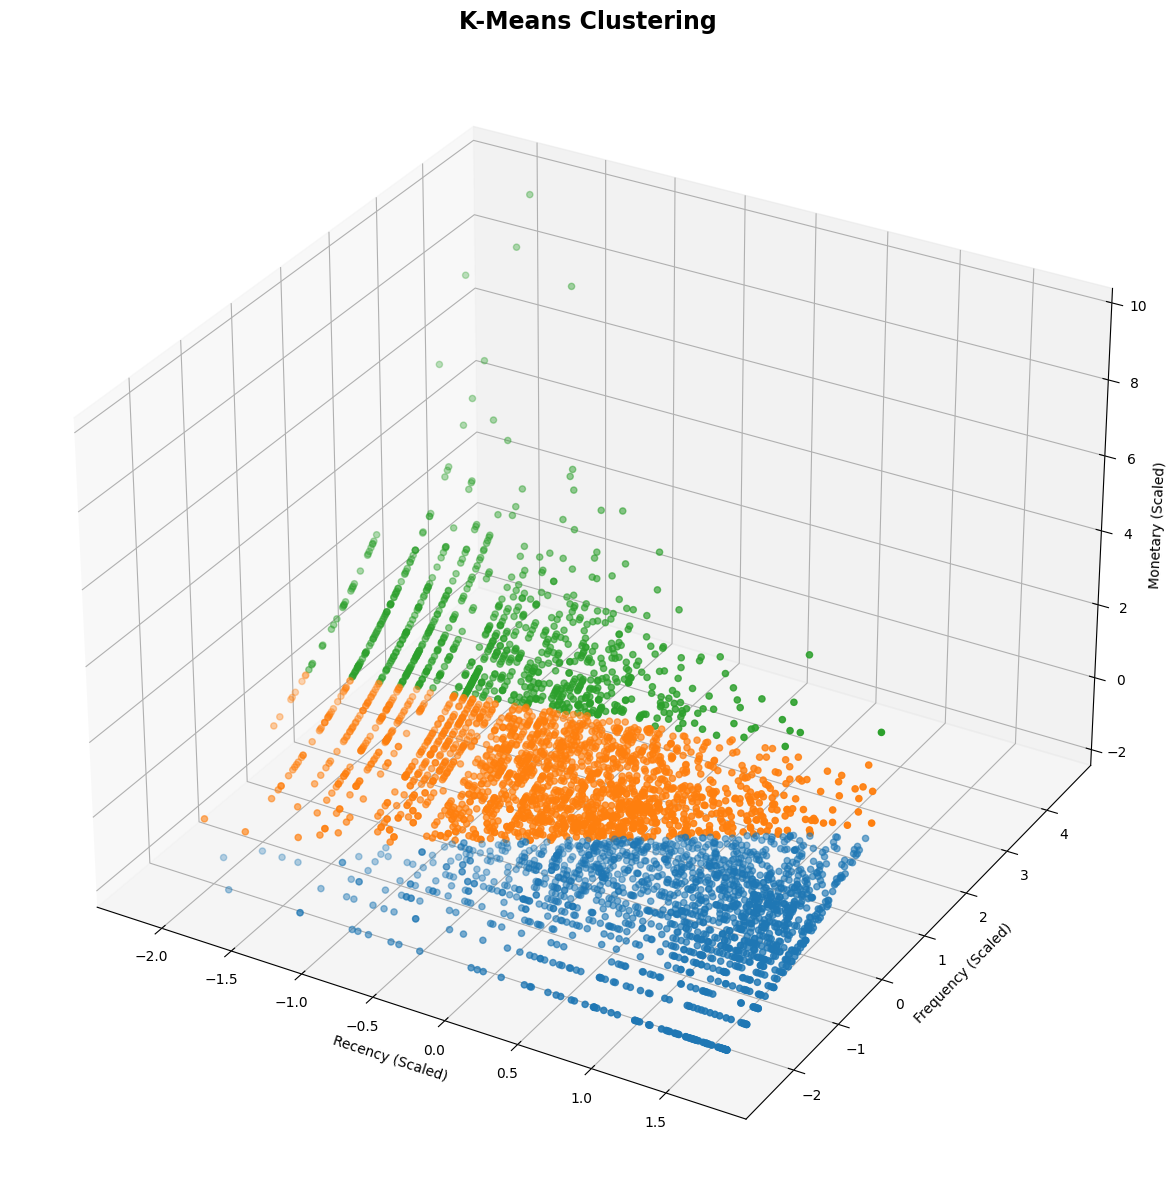

In [ ]:
# Visualize with 3D graph by Recency, Frequency and Monetary
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Get the string names of the Recency, Frequency, and Monetary columns
recency_col = data_customers_use.columns[0]  # Cột recency
frequency_col = data_customers_use.columns[1]  # Cột frequency
monetary_col = data_customers_use.columns[2]  # Cột Monetary

for i in range(k):
    cluster_data = data_customers_use[data_customers_use['Cluster'] == i]
    # Use the string column names to access the data
    ax.scatter(cluster_data[recency_col], cluster_data[frequency_col], cluster_data[monetary_col], label=f'Cluster {i}')

ax.set_xlabel('Recency (Scaled)')
ax.set_ylabel('Frequency (Scaled)')
ax.set_zlabel('Monetary (Scaled)')
ax.set_title('K-Means Clustering', fontsize=17, fontweight='bold')
# # Convert all column names to strings
# data_customers_use.columns = data_customers_use.columns.astype(str)

# k = 3
# kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=1000, random_state=42)
# kmeans = kmeans.fit(data_customers_use)
# clusters = kmeans.predict(data_customers_use)
# data_customers_use['Cluster'] = clusters

In [ ]:
data_customers_use

,0,1,2,Cluster
0,1.606608,-2.098072,-1.473252,0
1,-1.696240,1.151346,1.122569,2
2,0.317615,-0.224316,-0.365063,1
3,-0.669146,0.423978,0.246300,1
4,1.560253,-0.660498,-0.700854,0
...,...,...,...,...
4367,1.451203,-1.033496,-0.946379,0
4368,1.050909,-1.277936,-1.088626,0
4369,-1.186690,-0.850484,-0.830404,1
4370,-1.554639,2.363661,3.150346,2


#### **5. RFM clustering with the original dataset**

In [ ]:
# phan loai dua tren cluster
data_customers['Segment'] = clusters

In [ ]:
data_customers.head()

,Recency,Frequency,Monetary,Segment
CustomerID,,,,
12346.0,326,2,0.00,0
12347.0,3,182,4310.00,2
12348.0,76,31,1797.24,1
12349.0,19,73,1757.55,1
12350.0,311,17,334.40,0


In [ ]:
# tim tam tung cum
rfm_clusters = data_customers.groupby('Segment').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(0)
rfm_clusters

,Recency,Frequency,Monetary
Segment,,,
0,179.0,17.0,408.0
1,48.0,63.0,1267.0
2,19.0,319.0,6422.0


`Visualize with 3D graph by Recency, Frequency and Monetary for main data (rfm dataframe)`

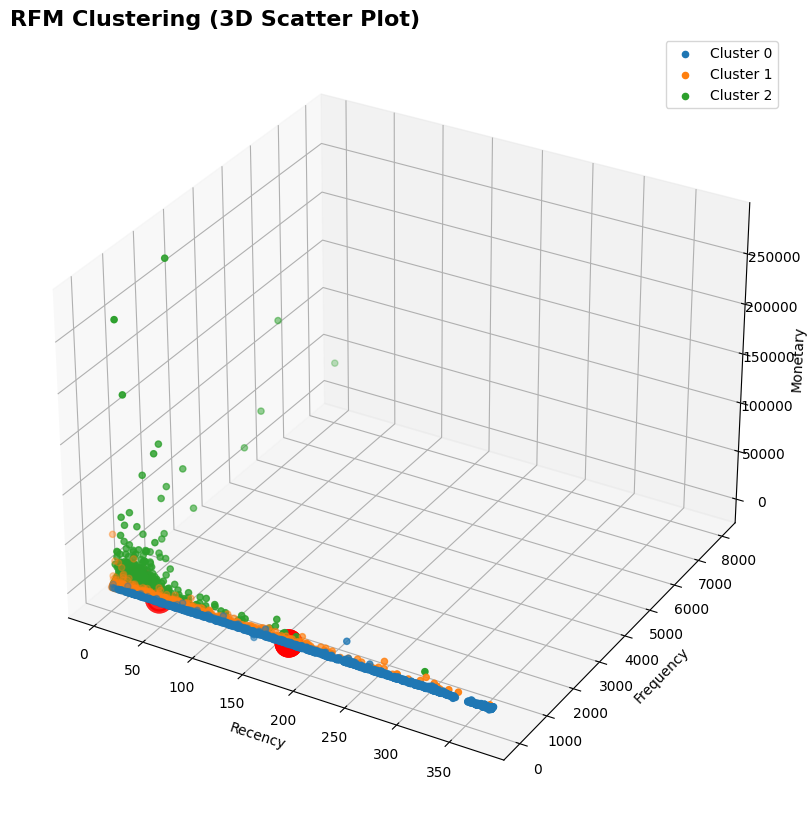

In [ ]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111, projection='3d')
k = 3

for i in range(k):
    cluster_data = data_customers[data_customers['Segment'] == i]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'], label=f'Cluster {i}')
    # Plot centroids
    centroids = rfm_clusters
    ax.scatter(centroids['Recency'], centroids['Frequency'], centroids['Monetary'], marker='o', s=300, linewidths=3, color='red', zorder=10)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM Clustering (3D Scatter Plot)',loc = 'left',  fontweight = 'heavy', fontsize = 16)
ax.legend()
plt.show()


#### **6. Summary RFM after clustering and evaluating metrics**

In [ ]:
data_customers

,Recency,Frequency,Monetary,Segment
CustomerID,,,,
12346.0,326,2,0.00,0
12347.0,3,182,4310.00,2
12348.0,76,31,1797.24,1
12349.0,19,73,1757.55,1
12350.0,311,17,334.40,0
...,...,...,...,...
18280.0,278,10,180.60,0
18281.0,181,7,80.82,0
18282.0,8,13,176.60,1


In [ ]:
data_customers.describe()

,Recency,Frequency,Monetary,Segment
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,92.581199,93.053294,1898.459701,0.804209
std,100.772139,232.471608,8219.345141,0.727975
min,1.000000,1.000000,-4287.630000,0.000000
25%,17.000000,17.000000,293.362500,0.000000
50%,51.000000,42.000000,648.075000,1.000000
75%,144.000000,102.000000,1611.725000,1.000000
max,374.000000,7983.000000,279489.020000,2.000000


In [ ]:
data_customers[data_customers['Segment'] == 0].describe()

,Recency,Frequency,Monetary,Segment
count,1670.000000,1670.000000,1670.000000,1670.0
mean,179.212575,17.032335,407.533103,0.0
std,105.133381,13.420343,762.966973,0.0
min,2.000000,1.000000,-4287.630000,0.0
25%,81.000000,7.000000,152.095000,0.0
50%,174.000000,14.000000,275.340000,0.0
75%,265.000000,23.750000,455.735000,0.0
max,374.000000,85.000000,21535.900000,0.0


In [ ]:
data_customers[data_customers['Segment'] == 1].describe()

,Recency,Frequency,Monetary,Segment
count,1888.000000,1888.000000,1888.000000,1888.0
mean,47.781250,62.941737,1266.973439,1.0
std,49.724768,34.620263,2136.410463,0.0
min,1.000000,4.000000,0.000000,1.0
25%,16.000000,35.000000,464.342500,1.0
50%,32.000000,57.000000,826.920000,1.0
75%,62.000000,86.000000,1436.395000,1.0
max,370.000000,210.000000,52750.840000,1.0


In [ ]:
data_customers[data_customers['Segment'] == 2].describe()

,Recency,Frequency,Monetary,Segment
count,814.000000,814.000000,8.140000e+02,814.0
mean,18.757985,318.858722,6.421916e+03,2.0
std,25.182808,471.568622,1.804018e+04,0.0
min,1.000000,86.000000,3.552714e-15,2.0
25%,4.000000,162.000000,1.868135e+03,2.0
50%,10.000000,219.000000,3.032375e+03,2.0
75%,24.000000,329.000000,5.135685e+03,2.0
max,303.000000,7983.000000,2.794890e+05,2.0


In [ ]:
# Sử dụng describe để mô tả dữ liệu
segment_2 = data_customers[data_customers['Segment'] == 2].describe()
# Hiển thị dữ liệu với định dạng số thập phân
segment_2 = segment_2.applymap(lambda x: '{:.2f}'.format(x))
# Chuyển đổi về DataFrame
segment_2 = pd.DataFrame(segment_2)
print(segment_2)

      Recency Frequency   Monetary Segment
count  814.00    814.00     814.00  814.00
mean    18.76    318.86    6421.92    2.00
std     25.18    471.57   18040.18    0.00
min      1.00     86.00       0.00    2.00
25%      4.00    162.00    1868.13    2.00
50%     10.00    219.00    3032.38    2.00
75%     24.00    329.00    5135.68    2.00
max    303.00   7983.00  279489.02    2.00


In [ ]:
# số lượng cus mỗi segment
cluster = data_customers['Segment'].value_counts().to_frame().reset_index()
cluster.columns = ['Segment', 'Number']
cluster

,Segment,Number
0,1,1888
1,0,1670
2,2,814


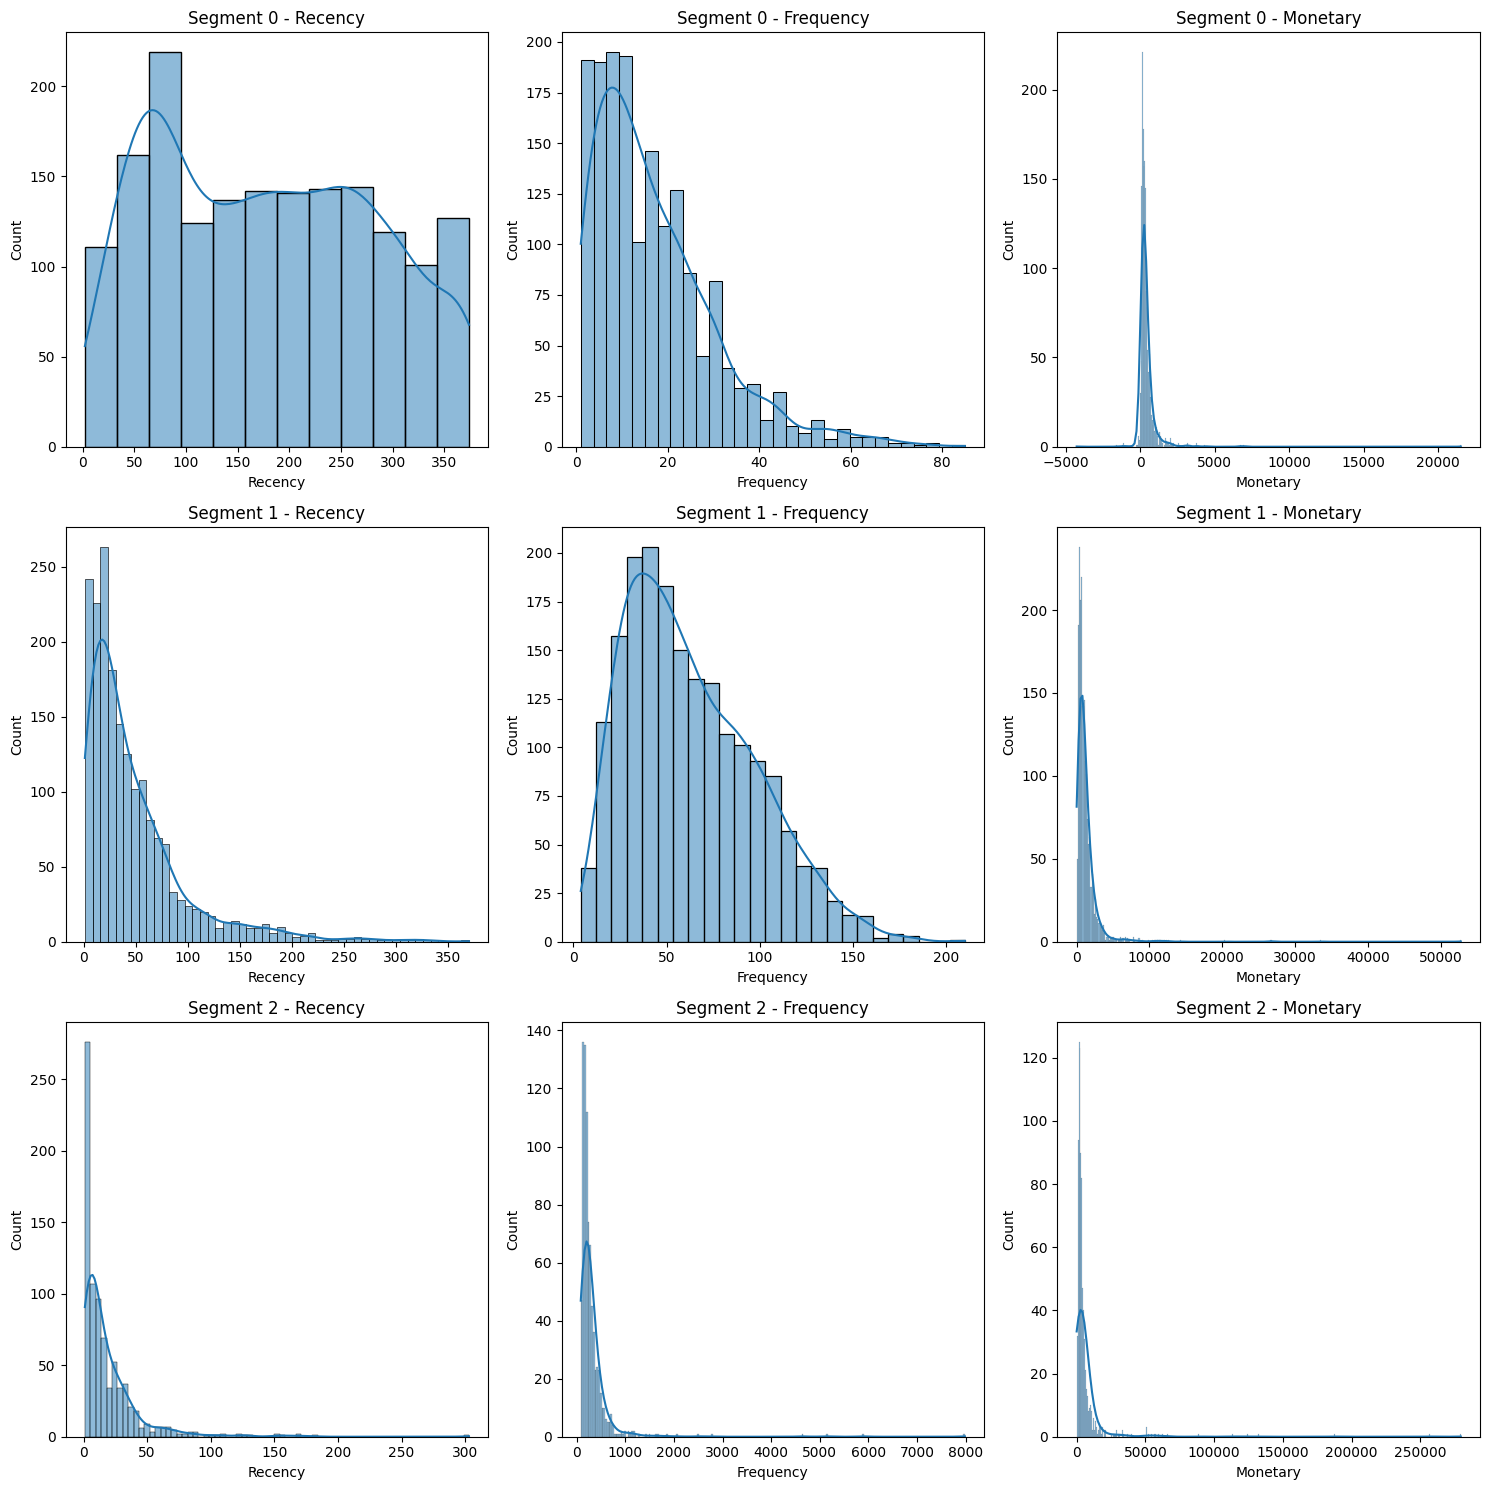

In [ ]:
# vẽ hist

# Create subplots for each segment
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, segment in enumerate(['Segment 0', 'Segment 1', 'Segment 2']):
    segment_data = data_customers[data_customers['Segment'] == i]
    sb.histplot(segment_data['Recency'], ax=axes[i, 0], kde=True).set_title(f'{segment} - Recency')
    sb.histplot(segment_data['Frequency'], ax=axes[i, 1], kde=True).set_title(f'{segment} - Frequency')
    sb.histplot(segment_data['Monetary'], ax=axes[i, 2], kde=True).set_title(f'{segment} - Monetary')

plt.tight_layout()
plt.show()


##  **VI. Conclusion**

#### **Segment 0**
`Đánh giá các chỉ số:`
- **Recency:** Thời gian mua hàng trung bình gần nhất là 179 ngày ▶ Rất dài ▶ Khách hàng chưa mua hàng trong 1 khoảng thời gian dài
- **Frequency:** Tần suất mua hàng trung bình 17 lần trên hơn 1 năm. Tần suất giao động từ 7 đến 23 lần trong hơn 1 năm ▶ Khách hàng rất ít khi mua hàng ▶ Tần suất mua hàng ở mức rất xấu
- **Monetary:** Giá trị giao dịch trung bình 408.  Giá trị giao động từ 152 - 456 ▶ Thấp ▶ Mua hàng với tổng giá trị thấp

`Kết luận:`

Segment 0 có thể được phân loại vào nhóm khách hàng "Khách hàng gặp ngủ đông" (Hibernating Customers): Là những khách hàng đã khá lâu không quay lại, sức mua yếu (tần suất mua thấp và giá trị giỏ hàng không cao).

Lý do:
- **Recency thấp**: Thời gian mua hàng trung bình gần nhất là 179 ngày, rất dài. Điều này cho thấy họ đã không mua hàng trong một thời gian dài.
- **Frequency trung bình thấp**: Tần suất mua hàng trung bình là 17 lần trên hơn 1 năm, khá thấp. Điều này cho thấy họ rất ít khi mua hàng.
- **Monetary thấp**: Giá trị giao dịch trung bình là 408, thuộc mức thấp. Điều này cho thấy họ mua hàng với tổng giá trị thấp.

`Khuyến nghị:`
- Kích hoạt lại: Cần có các chiến lược kích hoạt lại khách hàng, thu hút sự chú ý của họ và khuyến khích họ mua hàng trở lại. Ví dụ:
  - Cung cấp mã giảm giá hấp dẫn hoặc ưu đãi đặc biệt.
  - Gửi email hoặc tin nhắn nhắc nhở về sản phẩm mới hoặc chương trình khuyến mãi phù hợp với sở thích của họ.
  - Chia sẻ nội dung hấp dẫn về sản phẩm hoặc dịch vụ của bạn trên mạng xã hội.
- Cân nhắc loại bỏ: Nếu các chiến lược kích hoạt lại không hiệu quả, có thể cân nhắc loại bỏ họ khỏi danh sách tiếp thị.

#### **Segment 1**

`Đánh giá các chỉ số:`
- **Recency:** Thời gian mua hàng trung bình gần nhất là 47 ngày ▶ Khá ngắn ▶ Khách hàng mua hàng khá thường xuyên
- **Frequency:** Tần suất mua hàng trung bình 62 lần trên hơn 1  năm. Tần suất giao động từ 35 đến 86 lần ▶ Cao ▶ Tần suất mua hàng ở mức tốt
- **Monetary:** Giá trị giao dịch trung bình 1267. Giá trị giao động từ 464 - 1436 ▶ Cao ▶ Mua hàng với tổng giá trị cao

`Kết luận:`
Dựa trên các phân tích RFM, Segment 1 có thể được phân loại vào nhóm khách hàng "Khách hàng trung thành" (Loyal Customers): Là những khách hàng chi tiêu ở mức trung bình – khá nhưng mua hàng rất thường xuyên.

Lý do:
- Recency khá thấp: Họ đã mua hàng gần đây, cho thấy họ có khả năng mua hàng trong tương lai.
- Frequency cao: Tần suất mua hàng trung bình là 62 lần trên hơn 1 năm, cao. Điều này cho thấy họ là những khách hàng trung thành, mua hàng thường xuyên.
- Monetary cao: Giá trị giao dịch trung bình là 1267, thuộc mức cao. Điều này cho thấy họ mua hàng với tổng giá trị lớn.

`Để khai thác hết tiềm năng của nhóm khách hàng này, chúng ta cần:`
- Nâng cao trải nghiệm: Nâng cao trải nghiệm mua hàng cho khách hàng trung thành bằng các chương trình ưu đãi đặc biệt, dịch vụ khách hàng ưu tiên, quà tặng sinh nhật hoặc các ưu đãi độc quyền.
- Khuyến khích mua hàng: Tập trung vào việc cung cấp sản phẩm mới, khuyến mãi hấp dẫn phù hợp với sở thích của họ.
- Củng cố lòng trung thành: Tạo các chương trình khách hàng thân thiết, tích điểm, hoặc các chương trình tặng quà để khuyến khích họ tiếp tục mua hàng.
- Thấu hiểu nhu cầu: Phân tích thêm dữ liệu về khách hàng này, chẳng hạn như lịch sử mua hàng, sản phẩm ưa thích, để hiểu rõ nhu cầu của họ và đưa ra các khuyến nghị phù hợp và cá nhân hóa hơn.

#### **Segment 2**

`Đánh giá các chỉ số:`
- **Recency:** Thời gian mua hàng trung bình gần nhất là 18 ngày ▶ Rất ngắn ▶ Khách hàng mới mua hàng
- **Frequency:** Tần suất mua hàng trung bình 319 lần trên hơn năm. Tần suất giao động từ 162 đến 329 lần ▶ Rất rất cao ▶ Gần như ngày nào cũng mua hàng
- **Monetary:** Giá trị giao dịch trung bình 6422.  Giá trị giao động từ 1868 - 5136 ▶ Rất rất cao ▶ Mua hàng với tổng giá trị rất cao và cho nhiều sản phẩm

`Kết luận:`

Segment 2 có thể được phân loại vào nhóm "Khách hàng VIP" (VIP Customers) hoặc "Khách hàng trung thành cao cấp" (High-Value Loyal Customers): Là những khách hàng mới giao dịch, mua hàng thường xuyên và chi tiêu nhiều nhất.Những khách hàng này rất trung thành, sẵn sàng chi tiêu hào phóng và có khả năng sẽ sớm thực hiện một giao dịch mua khác.

Lý do:
- Recency rất thấp: Thời gian mua hàng trung bình gần nhất là 18 ngày, rất ngắn. Điều này cho thấy họ là những khách hàng thường xuyên mua hàng và rất gần đây.
- Frequency rất cao: Tần suất mua hàng trung bình là 319 lần trên hơn 1 năm, rất cao. Điều này cho thấy họ là những khách hàng trung thành, mua hàng rất thường xuyên, gần như hàng ngày.
- Monetary rất cao: Giá trị giao dịch trung bình là 6422, rất rất cao. Điều này cho thấy họ mua hàng với tổng giá trị lớn và chi tiêu nhiều cho sản phẩm hoặc dịch vụ của bạn.

`Để khai thác hết tiềm năng của nhóm khách hàng này, chúng ta cần:`
- Chăm sóc VIP: Cung cấp dịch vụ khách hàng ưu tiên, chương trình khách hàng VIP, quà tặng đặc biệt, ưu đãi độc quyền, và các chương trình tri ân dành riêng cho họ.
- Thấu hiểu sâu sắc: Phân tích chi tiết hơn về lịch sử mua hàng, sản phẩm ưa thích, hành vi mua hàng, để hiểu rõ nhu cầu và sở thích của họ.
- Tăng cường tương tác: Tạo các chương trình tương tác, khuyến khích họ chia sẻ ý tưởng, phản hồi để xây dựng mối quan hệ lâu dài.
- Phát triển sản phẩm: Phát triển các sản phẩm mới hoặc các dịch vụ nâng cao phù hợp với nhu cầu của họ.
- Kiểm tra các bất thường: Cần kiểm tra xem có bất kỳ bất thường nào trong dữ liệu của nhóm này, chẳng hạn như lỗi ghi nhận, mua hàng bất thường, để đảm bảo chính xác của phân tích.

# **VII. Transform Cluster to Segment**

In [ ]:
rfm_clusters.reset_index(inplace = True)
# Transform from Cluster to Segment name
data_customers['Segment'] = data_customers['Segment'].replace(0, 'Hibernating Customers')
rfm_clusters['Segment'] = rfm_clusters['Segment'].replace(0, 'Hibernating Customers')

data_customers['Segment'] = data_customers['Segment'].replace(1, 'Loyal Customers')
rfm_clusters['Segment'] = rfm_clusters['Segment'].replace(1, 'Loyal Customers')

data_customers['Segment'] = data_customers['Segment'].replace(2, 'VIP Customers')
rfm_clusters['Segment'] = rfm_clusters['Segment'].replace(2, 'VIP Customers')

data_customers = data_customers.reset_index()
data_customers

,CustomerID,Recency,Frequency,Monetary,Segment
0,12346.0,326,2,0.00,Hibernating Customers
1,12347.0,3,182,4310.00,VIP Customers
2,12348.0,76,31,1797.24,Loyal Customers
3,12349.0,19,73,1757.55,Loyal Customers
4,12350.0,311,17,334.40,Hibernating Customers
...,...,...,...,...,...
4367,18280.0,278,10,180.60,Hibernating Customers
4368,18281.0,181,7,80.82,Hibernating Customers
4369,18282.0,8,13,176.60,Loyal Customers
4370,18283.0,4,756,2094.88,VIP Customers


In [ ]:
data_customers['Segment'].value_counts()

Segment
Loyal Customers          1888
Hibernating Customers    1670
VIP Customers             814
Name: count, dtype: int64

In [ ]:
rfm_clusters

,Segment,Recency,Frequency,Monetary
0,Hibernating Customers,179.0,17.0,408.0
1,Loyal Customers,48.0,63.0,1267.0
2,VIP Customers,19.0,319.0,6422.0


In [ ]:
# Merge Segment column from rfm dataframe in data df
data_not_nan = data_not_nan.merge(data_customers[['CustomerID', 'Segment']], on = 'CustomerID')

# Test sample data in dataframe
data_not_nan

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPay,Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,VIP Customers
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,VIP Customers
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,VIP Customers
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,VIP Customers
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,VIP Customers
...,...,...,...,...,...,...,...,...,...,...
406824,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09,1.25,12713.0,Germany,15.00,Loyal Customers
406825,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09,0.85,12713.0,Germany,10.20,Loyal Customers
406826,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09,0.85,12713.0,Germany,10.20,Loyal Customers
406827,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09,2.08,12713.0,Germany,24.96,Loyal Customers


In [ ]:
# Check nunique data Segment using group by Store Number
data_not_nan.groupby('Segment')['CustomerID'].nunique()

Segment
Hibernating Customers    1670
Loyal Customers          1888
VIP Customers             814
Name: CustomerID, dtype: int64

In [ ]:
# to file csv
# data_not_nan.to_csv('rfm_analysis.csv', index=False)